In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt

MODEL_NO_QUANT_TFLITE = 'model_no_quant.tflite'
MODEL_TFLITE = 'model.tflite'
MODEL_TFLITE_MICRO = 'model.cc'

In [2]:
#The data processing for the training and testing data sets
def data_train(filename, split = True):
    train_data = pd.read_excel(filename)
    train_data['Data'] = train_data['Data'] / 10000000
    
    tmp = train_data[['Data']].copy()

    X = pd.DataFrame(tmp).to_numpy()
    X = np.float32(X)
    
    if split == True:
        m = X.shape[0]
        Y = np.array([train_data['Active Attack'].values])
        Y = np.float32(Y)
        Y = Y.T
        
        #Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuff_X = X[permutation, :]
        shuff_Y = Y[permutation, :]
    
        devM = round(m * .3) # 30% of the set
        devM2 = m - devM # 70% of the set
        devM3 = round(devM / 2) #15% of the set
        
        train_X = shuff_X[0:(devM2), :]
        train_Y = shuff_Y[0:(devM2), :]
        dev_X = shuff_X[-(devM):-(devM3), :]
        dev_Y = shuff_Y[-(devM):-(devM3), :]
        test_X = shuff_X[-(devM3):, :]
        test_Y = shuff_Y[-(devM3):, :]
        
        m_train = train_X.shape[0]
        m_dev = dev_X.shape[0]
        m_test = test_X.shape[0]
        
        print ("Number of training examples: m_train = " + str(m_train))
        print ("train_set_x shape: " + str(train_X.shape))
        print ("train_set_y shape: " + str(train_Y.shape))
        print ("Number of dev examples: m_test = " + str(m_dev))
        print ("test_set_x shape: " + str(dev_X.shape))
        print ("test_set_y shape: " + str(dev_Y.shape))       
        print ("Number of testing examples: m_train = " + str(m_test))
        print ("train_set_x shape: " + str(test_X.shape))
        print ("train_set_y shape: " + str(test_Y.shape))
    
        return train_X, train_Y, dev_X, dev_Y, test_X, test_Y
    
    return X
    
train_X, train_Y, dev_X, dev_Y, test_X, test_Y = data_train("PuttyData.xlsx", split = True)

Number of training examples: m_train = 910
train_set_x shape: (910, 1)
train_set_y shape: (910, 1)
Number of dev examples: m_test = 195
test_set_x shape: (195, 1)
test_set_y shape: (195, 1)
Number of testing examples: m_train = 195
train_set_x shape: (195, 1)
train_set_y shape: (195, 1)


In [3]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_X, train_Y, epochs=500, batch_size=64,
                    validation_data=(dev_X, dev_Y))

Train on 910 samples, validate on 195 samples
Epoch 1/500
910/910 [==============================] - 1s 665us/sample - loss: 0.6081 - mae: 0.7465 - val_loss: 0.5561 - val_mae: 0.7228
Epoch 2/500
910/910 [==============================] - 0s 66us/sample - loss: 0.4544 - mae: 0.6466 - val_loss: 0.4092 - val_mae: 0.6140
Epoch 3/500
910/910 [==============================] - 0s 60us/sample - loss: 0.3214 - mae: 0.5358 - val_loss: 0.2870 - val_mae: 0.4961
Epoch 4/500
910/910 [==============================] - 0s 63us/sample - loss: 0.2222 - mae: 0.4216 - val_loss: 0.2017 - val_mae: 0.3781
Epoch 5/500
910/910 [==============================] - 0s 55us/sample - loss: 0.1645 - mae: 0.3117 - val_loss: 0.1551 - val_mae: 0.2697
Epoch 6/500
910/910 [==============================] - 0s 62us/sample - loss: 0.1430 - mae: 0.2458 - val_loss: 0.1392 - val_mae: 0.2637
Epoch 7/500
910/910 [==============================] - 0s 64us/sample - loss: 0.1369 - mae: 0.2595 - val_loss: 0.1317 - val_mae: 0.2608
E

910/910 [==============================] - 0s 55us/sample - loss: 0.0473 - mae: 0.1203 - val_loss: 0.0326 - val_mae: 0.0967
Epoch 61/500
910/910 [==============================] - 0s 53us/sample - loss: 0.0463 - mae: 0.1168 - val_loss: 0.0320 - val_mae: 0.0961
Epoch 62/500
910/910 [==============================] - 0s 54us/sample - loss: 0.0453 - mae: 0.1131 - val_loss: 0.0314 - val_mae: 0.0942
Epoch 63/500
910/910 [==============================] - 0s 58us/sample - loss: 0.0444 - mae: 0.1128 - val_loss: 0.0309 - val_mae: 0.0950
Epoch 64/500
910/910 [==============================] - 0s 56us/sample - loss: 0.0435 - mae: 0.1097 - val_loss: 0.0303 - val_mae: 0.0928
Epoch 65/500
910/910 [==============================] - 0s 58us/sample - loss: 0.0425 - mae: 0.1147 - val_loss: 0.0297 - val_mae: 0.0933
Epoch 66/500
910/910 [==============================] - 0s 62us/sample - loss: 0.0413 - mae: 0.1078 - val_loss: 0.0288 - val_mae: 0.0864
Epoch 67/500
910/910 [==============================] 

910/910 [==============================] - 0s 56us/sample - loss: 0.0098 - mae: 0.0217 - val_loss: 0.0102 - val_mae: 0.0226
Epoch 120/500
910/910 [==============================] - 0s 51us/sample - loss: 0.0098 - mae: 0.0236 - val_loss: 0.0102 - val_mae: 0.0251
Epoch 121/500
910/910 [==============================] - 0s 58us/sample - loss: 0.0098 - mae: 0.0233 - val_loss: 0.0101 - val_mae: 0.0245
Epoch 122/500
910/910 [==============================] - 0s 56us/sample - loss: 0.0098 - mae: 0.0215 - val_loss: 0.0101 - val_mae: 0.0224
Epoch 123/500
910/910 [==============================] - 0s 57us/sample - loss: 0.0098 - mae: 0.0213 - val_loss: 0.0101 - val_mae: 0.0250
Epoch 124/500
910/910 [==============================] - 0s 59us/sample - loss: 0.0098 - mae: 0.0222 - val_loss: 0.0101 - val_mae: 0.0239
Epoch 125/500
910/910 [==============================] - 0s 51us/sample - loss: 0.0097 - mae: 0.0228 - val_loss: 0.0101 - val_mae: 0.0238
Epoch 126/500
910/910 [=========================

910/910 [==============================] - 0s 56us/sample - loss: 0.0095 - mae: 0.0186 - val_loss: 0.0100 - val_mae: 0.0222
Epoch 179/500
910/910 [==============================] - 0s 59us/sample - loss: 0.0096 - mae: 0.0212 - val_loss: 0.0100 - val_mae: 0.0242
Epoch 180/500
910/910 [==============================] - 0s 57us/sample - loss: 0.0096 - mae: 0.0187 - val_loss: 0.0100 - val_mae: 0.0194
Epoch 181/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0096 - mae: 0.0198 - val_loss: 0.0100 - val_mae: 0.0240
Epoch 182/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0095 - mae: 0.0200 - val_loss: 0.0099 - val_mae: 0.0210
Epoch 183/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0096 - mae: 0.0173 - val_loss: 0.0099 - val_mae: 0.0191
Epoch 184/500
910/910 [==============================] - 0s 56us/sample - loss: 0.0096 - mae: 0.0185 - val_loss: 0.0100 - val_mae: 0.0228
Epoch 185/500
910/910 [=========================

910/910 [==============================] - 0s 54us/sample - loss: 0.0094 - mae: 0.0213 - val_loss: 0.0098 - val_mae: 0.0217
Epoch 238/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0094 - mae: 0.0188 - val_loss: 0.0098 - val_mae: 0.0199
Epoch 239/500
910/910 [==============================] - 0s 52us/sample - loss: 0.0094 - mae: 0.0185 - val_loss: 0.0098 - val_mae: 0.0211
Epoch 240/500
910/910 [==============================] - 0s 53us/sample - loss: 0.0095 - mae: 0.0181 - val_loss: 0.0098 - val_mae: 0.0191
Epoch 241/500
910/910 [==============================] - 0s 56us/sample - loss: 0.0094 - mae: 0.0183 - val_loss: 0.0098 - val_mae: 0.0218
Epoch 242/500
910/910 [==============================] - 0s 57us/sample - loss: 0.0094 - mae: 0.0204 - val_loss: 0.0098 - val_mae: 0.0228
Epoch 243/500
910/910 [==============================] - 0s 58us/sample - loss: 0.0095 - mae: 0.0185 - val_loss: 0.0098 - val_mae: 0.0194
Epoch 244/500
910/910 [=========================

Epoch 296/500
910/910 [==============================] - 0s 60us/sample - loss: 0.0093 - mae: 0.0187 - val_loss: 0.0096 - val_mae: 0.0198
Epoch 297/500
910/910 [==============================] - 0s 57us/sample - loss: 0.0093 - mae: 0.0188 - val_loss: 0.0096 - val_mae: 0.0202
Epoch 298/500
910/910 [==============================] - 0s 52us/sample - loss: 0.0093 - mae: 0.0186 - val_loss: 0.0096 - val_mae: 0.0200
Epoch 299/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0093 - mae: 0.0212 - val_loss: 0.0096 - val_mae: 0.0237
Epoch 300/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0093 - mae: 0.0191 - val_loss: 0.0096 - val_mae: 0.0193
Epoch 301/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0093 - mae: 0.0219 - val_loss: 0.0097 - val_mae: 0.0248
Epoch 302/500
910/910 [==============================] - 0s 58us/sample - loss: 0.0092 - mae: 0.0211 - val_loss: 0.0096 - val_mae: 0.0198
Epoch 303/500
910/910 [===========

910/910 [==============================] - 0s 53us/sample - loss: 0.0091 - mae: 0.0196 - val_loss: 0.0093 - val_mae: 0.0182
Epoch 356/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0091 - mae: 0.0173 - val_loss: 0.0093 - val_mae: 0.0193
Epoch 357/500
910/910 [==============================] - 0s 56us/sample - loss: 0.0091 - mae: 0.0186 - val_loss: 0.0093 - val_mae: 0.0208
Epoch 358/500
910/910 [==============================] - 0s 56us/sample - loss: 0.0091 - mae: 0.0214 - val_loss: 0.0093 - val_mae: 0.0221
Epoch 359/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0091 - mae: 0.0188 - val_loss: 0.0093 - val_mae: 0.0192
Epoch 360/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0091 - mae: 0.0180 - val_loss: 0.0093 - val_mae: 0.0195
Epoch 361/500
910/910 [==============================] - 0s 53us/sample - loss: 0.0090 - mae: 0.0186 - val_loss: 0.0093 - val_mae: 0.0200
Epoch 362/500
910/910 [=========================

910/910 [==============================] - 0s 53us/sample - loss: 0.0089 - mae: 0.0173 - val_loss: 0.0090 - val_mae: 0.0187
Epoch 415/500
910/910 [==============================] - 0s 52us/sample - loss: 0.0089 - mae: 0.0209 - val_loss: 0.0090 - val_mae: 0.0219
Epoch 416/500
910/910 [==============================] - 0s 54us/sample - loss: 0.0089 - mae: 0.0181 - val_loss: 0.0090 - val_mae: 0.0164
Epoch 417/500
910/910 [==============================] - 0s 51us/sample - loss: 0.0088 - mae: 0.0173 - val_loss: 0.0090 - val_mae: 0.0201
Epoch 418/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0089 - mae: 0.0220 - val_loss: 0.0091 - val_mae: 0.0234
Epoch 419/500
910/910 [==============================] - 0s 59us/sample - loss: 0.0089 - mae: 0.0196 - val_loss: 0.0090 - val_mae: 0.0175
Epoch 420/500
910/910 [==============================] - 0s 54us/sample - loss: 0.0089 - mae: 0.0169 - val_loss: 0.0090 - val_mae: 0.0191
Epoch 421/500
910/910 [=========================

910/910 [==============================] - 0s 56us/sample - loss: 0.0086 - mae: 0.0189 - val_loss: 0.0086 - val_mae: 0.0203
Epoch 474/500
910/910 [==============================] - 0s 51us/sample - loss: 0.0086 - mae: 0.0197 - val_loss: 0.0086 - val_mae: 0.0177
Epoch 475/500
910/910 [==============================] - 0s 54us/sample - loss: 0.0086 - mae: 0.0176 - val_loss: 0.0086 - val_mae: 0.0176
Epoch 476/500
910/910 [==============================] - 0s 56us/sample - loss: 0.0086 - mae: 0.0184 - val_loss: 0.0086 - val_mae: 0.0185
Epoch 477/500
910/910 [==============================] - 0s 54us/sample - loss: 0.0086 - mae: 0.0173 - val_loss: 0.0086 - val_mae: 0.0172
Epoch 478/500
910/910 [==============================] - 0s 55us/sample - loss: 0.0086 - mae: 0.0164 - val_loss: 0.0086 - val_mae: 0.0163
Epoch 479/500
910/910 [==============================] - 0s 54us/sample - loss: 0.0086 - mae: 0.0177 - val_loss: 0.0086 - val_mae: 0.0213
Epoch 480/500
910/910 [=========================

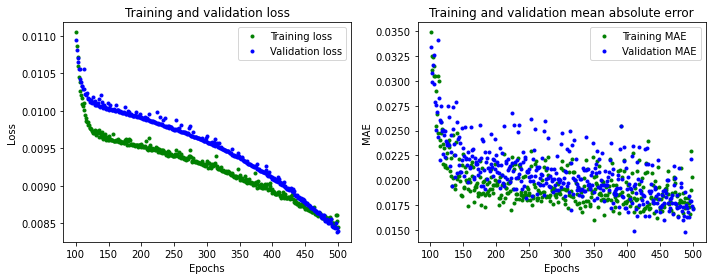

In [4]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

195/195 [==============================] - 0s 103us/sample - loss: 0.0202 - mae: 0.0311


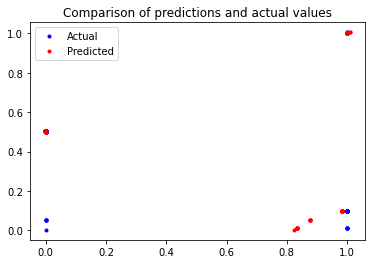

In [5]:
# Calculate and print the loss on our test dataset
loss = model.evaluate(test_X, test_Y)

# Make predictions based on our test dataset
predictions = model.predict(test_X)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(test_Y, test_X, 'b.', label='Actual')
plt.plot(predictions, test_X, 'r.', label='Predicted')
plt.legend()
plt.show()

In [6]:
# load model
#model = load_model('model.h5')
# summarize model.
#model.summary()

model.save("model_TinyML.h5")
print("Saved model to disk")

Saved model to disk


In [7]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(500):
    yield([train_X[i].reshape(1, 1)])
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce full-int8 quantization (except inputs/outputs which are always float)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

import os
model_size = os.path.getsize(MODEL_TFLITE)
print("Quantized model is %d bytes" % model_size)

Quantized model is 2904 bytes


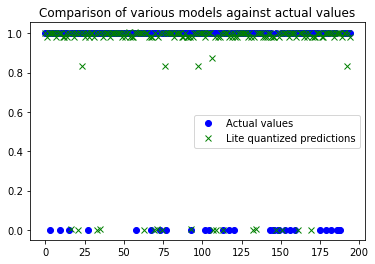

In [8]:
# Instantiate an interpreter for the model
model = tf.lite.Interpreter(MODEL_TFLITE)

# Allocate memory for the model
model.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
model_input = model.tensor(model.get_input_details()[0]["index"])
model_output = model.tensor(model.get_output_details()[0]["index"])

# Create arrays to store the results
model_predictions = np.empty(test_X.shape[0])

# Run each model's interpreter for each value and store the results in arrays
for i in range(test_X.size):
  model.set_tensor(model.get_input_details()[0]["index"], train_X[i].reshape(1,1))
  model.invoke()
  model_predictions[i] = model_output()[0]

# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(test_Y, 'bo', label='Actual values')
plt.plot(model_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()